In [15]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [16]:
n_resnet = [8, 14, 20, 26]

tf_model_sizes = {}
tflite_model_sizes = {}

for n in n_resnet:
    tf_model = glob.glob(f"./models/resnet{n}/resnet{n}*.keras")[0]
    tflite_model = glob.glob(f"./models/resnet{n}/resnet{n}*.tflite")[0]
    print(tf_model, tflite_model)

    # MB
    tf_model_sizes[str(n)] = round(os.path.getsize(tf_model) / (1024 * 1024), 4)
    tflite_model_sizes[str(n)] = round(os.path.getsize(tflite_model) / (1024 * 1024), 4)

tf_model_sizes, tflite_model_sizes



./models/resnet8/resnet8_model.210-0.4927387.keras ./models/resnet8/resnet8-model-optimized.tflite
./models/resnet14/resnet14_model.194-0.4832211.keras ./models/resnet14/resnet14-model-optimized.tflite
./models/resnet20/resnet20_model.124-0.5193782.keras ./models/resnet20/resnet20-model-optimized.tflite
./models/resnet26/resnet26_model.118-0.5752993.keras ./models/resnet26/resnet26-model-optimized.tflite


({'8': 1.0337, '14': 2.242, '20': 3.453, '26': 4.663},
 {'8': 0.0913, '14': 0.1942, '20': 0.2971, '26': 0.4001})

In [17]:
ratios = {}
for n in n_resnet:
    ratio = round(tf_model_sizes[str(n)] / tflite_model_sizes[str(n)], 4)
    ratios[str(n)] = ratio
ratios

{'8': 11.322, '14': 11.5448, '20': 11.6223, '26': 11.6546}

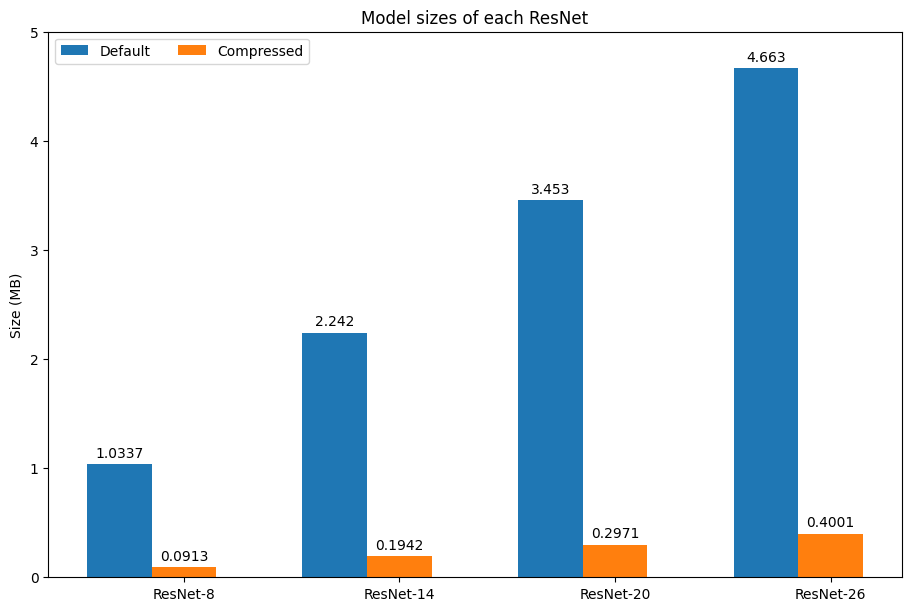

In [19]:
resnets = ("ResNet-8", "ResNet-14", "ResNet-20", "ResNet-26")

model_size = {}
model_size['Default'] = [tf_model_sizes[str(n)] for n in [8, 14, 20, 26]]
model_size['Compressed'] = [tflite_model_sizes[str(n)] for n in [8, 14, 20, 26]]

x = np.arange(len(resnets))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(9, 6))

for attribute, measurement in model_size.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size (MB)')
ax.set_title('Model sizes of each ResNet')
ax.set_xticks(x + width, resnets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 5)

plt.show()

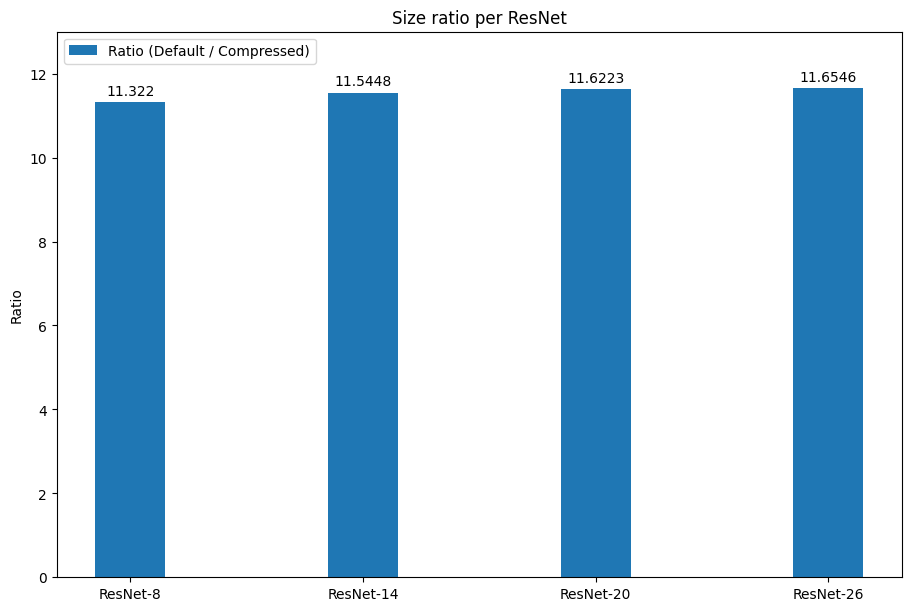

In [30]:
resnets = ("ResNet-8", "ResNet-14", "ResNet-20", "ResNet-26")

ratios_plot = {}
ratios_plot['Ratio (Default / Compressed)'] = [ratios[str(n)] for n in [8, 14, 20, 26]]

x = np.arange(len(resnets))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(9, 6))

for attribute, measurement in ratios_plot.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio')
ax.set_title('Size ratio per ResNet')
ax.set_xticks(x, resnets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 13)

plt.show()